In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/tokenized_access_logs.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv
/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DescriptionDataCoSupplyChain.csv


In [2]:
import numpy as np 
import pandas as pd 

In [4]:
df=pd.read_csv('/kaggle/input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv', encoding='latin-1')

In [5]:
copydf=df #copy to copydf
#creating a new column where it adds the the value 1 if fraud else o
copydf['SUSPECTED_FRAUD'] = np.where(copydf['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [6]:
copydf.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,SUSPECTED_FRAUD
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,0


In [7]:
#label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [8]:
features=copydf.drop(columns=['SUSPECTED_FRAUD','Order Status' ])
target=copydf['SUSPECTED_FRAUD']

In [9]:
#finding null values
features.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [10]:
features=features.apply(Labelencoder_feature)
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,3,18934,2568,0,0,47,40,66,...,609,114,47,0,78,78,62,0,27149,3
1,3,5,3,2272,2559,1,1,47,40,66,...,609,114,47,0,78,78,62,0,2209,3
2,0,4,3,2293,2555,3,0,47,40,452,...,609,114,47,0,78,78,62,0,1980,3
3,1,3,3,13638,2546,0,0,47,40,285,...,609,114,47,0,78,78,62,0,1752,3
4,2,2,3,20599,2526,0,0,47,40,66,...,609,114,47,0,78,78,62,0,1528,3


In [11]:
#deleting features which high-correlated with other features to avoid multicollinarity
data1=pd.concat([features,target],axis=1)

In [12]:
data1

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,SUSPECTED_FRAUD
0,1,3,3,18934,2568,0,0,47,40,66,...,114,47,0,78,78,62,0,27149,3,0
1,3,5,3,2272,2559,1,1,47,40,66,...,114,47,0,78,78,62,0,2209,3,0
2,0,4,3,2293,2555,3,0,47,40,452,...,114,47,0,78,78,62,0,1980,3,0
3,1,3,3,13638,2546,0,0,47,40,285,...,114,47,0,78,78,62,0,1752,3,0
4,2,2,3,20599,2526,0,0,47,40,66,...,114,47,0,78,78,62,0,1528,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,3,15208,2752,3,0,30,18,59,...,96,30,0,24,24,66,0,2733,3,0
180515,1,3,2,422,2743,1,1,30,18,26,...,96,30,0,24,24,66,0,2339,2,0
180516,3,5,3,20768,2734,1,1,30,18,55,...,96,30,0,24,24,66,0,2727,3,0
180517,2,3,3,21463,2725,0,0,30,18,66,...,96,30,0,24,24,66,0,2114,3,0


In [13]:
#finding correlation between variables 
corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8: #checking value is greater than 0.8
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Order Region',
       'Order State', 'Order Zipcode', 'Product Description', 'Product Image',
       'Product Status', 'SUSPECTED_FRAUD'],
      dtype='object')

In [14]:
features1=features[['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment', 
                    'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 
                    'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
                    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity',
                    'Order Region', 'Order State', 'Order Zipcode', 'Product Description', 'Product Image', 
                    'Product Status', 'Shipping Mode', 'Customer Id']]

In [15]:
from scipy.stats import pearsonr

corre=pd.DataFrame()

for i in features1.columns:
    corre[i]= pearsonr(target, features1[i])
    
    
corre

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
new_features= ['Type', 'Delivery Status', 'Order Region', 'Customer Country', 'Customer State', 'Order Zipcode',
               'Shipping Mode', 'Order Country', 'Customer Zipcode', 'Order City', 'Customer Segment', 'Order State',
               'Late_delivery_risk', 'Product Description', 'Product Status']

In [21]:
#Feature Selection
#it it the process to find out best feature on basis of f and p values
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [22]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [23]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value'])
f_reg_results.P_Value= f_reg_results.P_Value.astype(float)
f_reg_results=f_reg_results[f_reg_results.P_Value<0.06]
f_reg_results

,Variable,F_Value,P_Value
0,Type,7686.615869,0.000
40,Order Region,14.875551,0.000
27,Order Customer Id,15.868141,0.000
5,Delivery Status,3043.655705,0.000
6,Late_delivery_risk,5188.953532,0.000
13,Customer Id,15.868141,0.000
10,Customer Country,8.239934,0.004
41,Order State,6.728124,0.009
16,Customer Segment,6.358072,0.012
25,Order City,6.260967,0.012


In [24]:
f_reg_list=f_reg_results.Variable.values
f_reg_list

array(['Type', 'Order Region', 'Order Customer Id', 'Delivery Status',
       'Late_delivery_risk', 'Customer Id', 'Customer Country',
       'Order State', 'Customer Segment', 'Order City', 'Customer State',
       'Customer Zipcode', 'Longitude', 'Order Country', 'Latitude',
       'Order Zipcode', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype=object)

In [17]:
#final features list is both f_ref_list and new_feature
final_features=features[['Type', 'Order Region', 'Delivery Status', 'Late_delivery_risk',
       'Customer Country', 'Order State', 'Order City',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Order Country', 'Order Zipcode', 'shipping date (DateOrders)',
       'Shipping Mode']]

In [19]:
final_data=pd.concat([final_features, target], axis=1)

<Axes: >

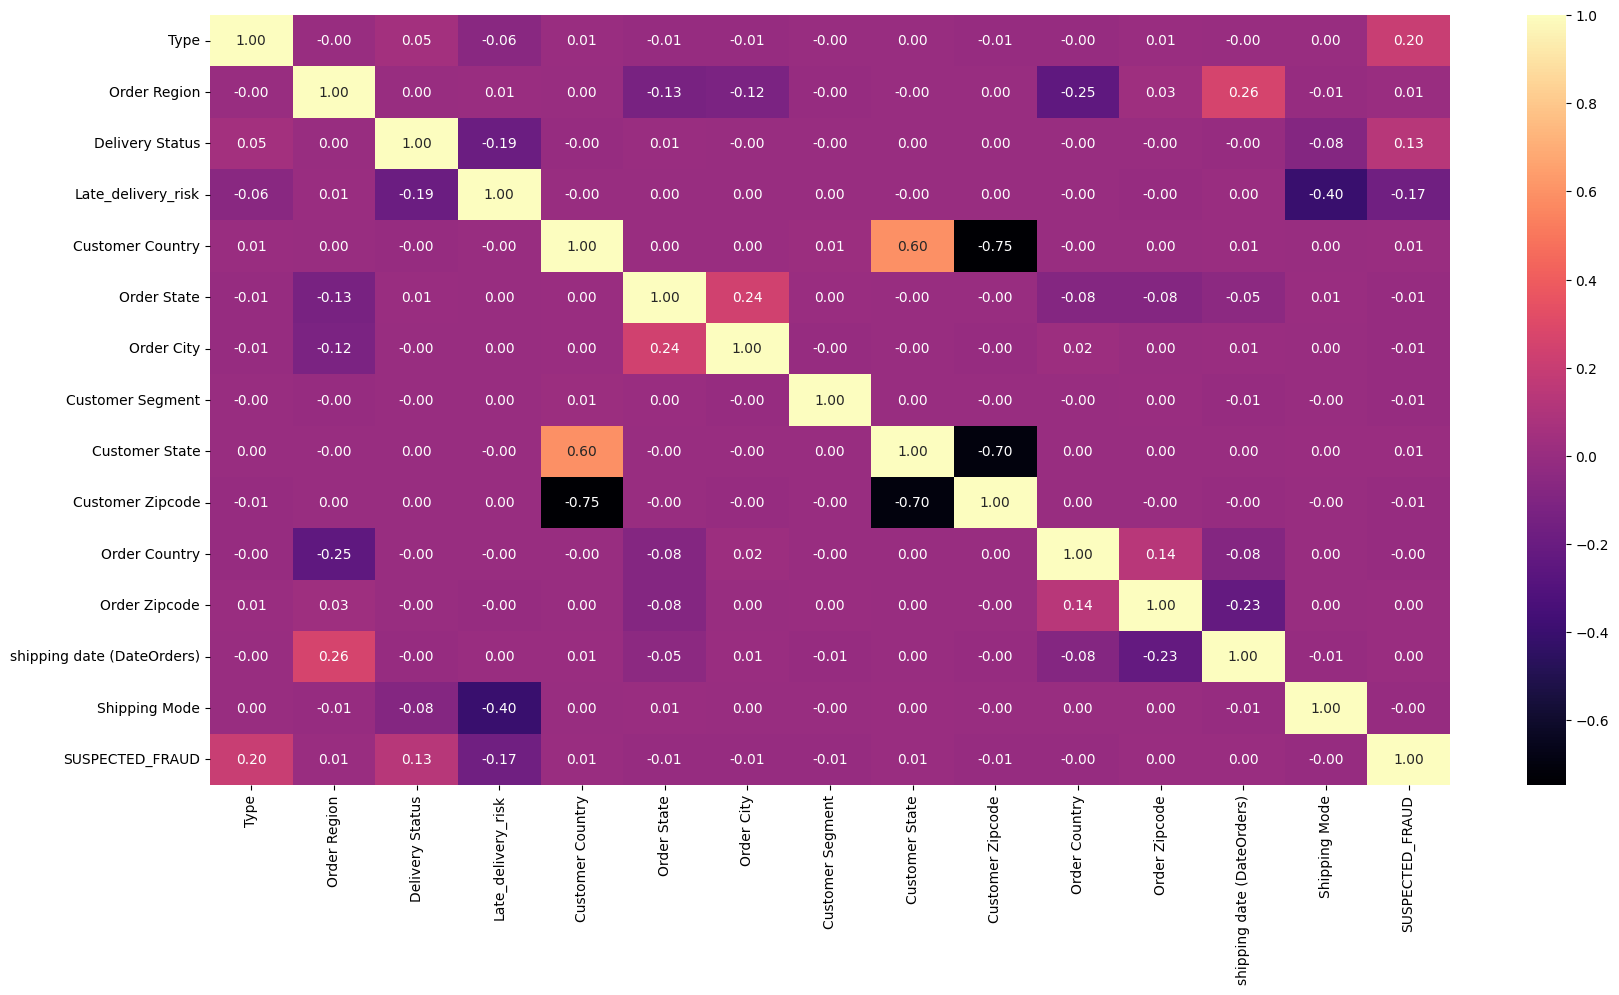

In [20]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f', cmap = 'magma')

In [21]:
final_features2=final_features.drop(columns=['Customer State', 'Customer Zipcode'])

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features2, target, test_size = 0.2, random_state = 42)

# **Logistic Regression**

In [26]:
#logistiic regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
def metric():
    
    TN, FP, FN, TP = cnf_matrix.ravel()

    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Calculate precision
    precision = TP / (TP + FP)

    # Calculate recall
    recall = TP / (TP + FN)

    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f'Accuracy: {accuracy}')
    print(f'F1-score: {f1_score}')
    

In [27]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35254,     0],
       [  850,     0]])

In [29]:
metric()

Accuracy: 0.9764569022822955
F1-score: nan


/tmp/ipykernel_33/96954390.py:9: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP / (TP + FP)


# **Random Forest**

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.996454686461334


# **DecisionTreeClassifier**

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9963438954132506


In [ ]:
#evaluation matrics are
* F1-score
* Accuracy
* Recall
* Precision

End of my code